In [2]:
library("tidyverse")

## Central Limit Theorm
Suppose that a category of world class runners are known to run a marathon (26 miles) in an average of 142 minutes with a standard deviation of 12 minutes. Consider 49 of the races.

Let
X
= the time to finish a race races.

X ~ N(142,12)

$\bar{X} \sim N \left(142,\frac{12}{\sqrt{49}}\right)$

In [28]:
n <- 49
mu <- 142
sigma <- 12/sqrt(n)

Part (a)
Give the distribution of
X.
(Round your standard deviation to two decimal places.)
X
~
,

In [29]:
sigma %>% round(2)

[1] 1.71

Part (b)
Find the probability that the runner will average between 140 and 143 minutes in these 49 marathons. (Round your answer to four decimal places.)

In [30]:
(pnorm(143,mu,sigma)-pnorm(140,mu,sigma)) %>% round(4)

[1] 0.5985

Part (c)
Find the 60th percentile for the average of these 49 marathons. (Round your answer to two decimal places.)
min

In [31]:
(qnorm(0.6,mu,sigma)) %>% round(2)

[1] 142.43

Part (d)
Find the median of the average running times.
min

In [32]:
qnorm(0.5,mu,sigma)

[1] 142

# <center> Types of Problems</center>

|Problem type  | helpful statistics and distributions to use |
|--------------|------------|
|sample size   |$n=\left\lceil{\left(\frac{2sz}{width}\right)^2}\right\rceil$|
|CI with large sample       | $\bar{X} \sim N\left(\bar{x},\frac{s}{\sqrt{n}}\right)$ |
|CI with known $\sigma$| $\bar{X} \sim N\left(\bar{x},\frac{\sigma}{\sqrt{n}}\right)$|
|all other CI    | $\frac{(\bar{X}-\bar{x})}{\frac{s}{\sqrt{n}}} \sim t(n-1)$|
|Hypothesis involving a proportion| $s=\sqrt{\frac{pq}{n}}$|
|left-tailed Hypothesis   |$\alpha = pnorm(z)$ OR $z = qnorm(\alpha)$ |
|right-tailed Hypothesis  |$\alpha = 1-pnorm(z)$ OR $z = qnorm(1-\alpha)$|
|two-tailed Hypothesis |$\frac{\alpha}{2} = 1-pnorm(z)$ OR $z = qnorm(1-\frac{\alpha}{2})$|
|Goodness of Fit test|$\sum{\left(\frac{(observed-expected)^2}{expected}\right)} \sim \chi^2_{df}$|
|Test for Independence |$\sum{\left(\frac{(observed-expected)^2}{expected}\right)} \sim \chi^2_{df}$|
|Test for Homogeneity|$\sum{\left(\frac{(observed-expected)^2}{expected}\right)} \sim \chi^2_{df}$|
|Test for Normality|$df\left(\frac{s^2}{\sigma^2_0}\right) \sim \chi^2_{df}$|
|Regression| $B_1 = \frac{sxy}{sxx}; B_0=\bar{y}-B_1\bar{x}$ | 
|Regression| $s = \sqrt{\frac{sse}{df}}; s_{B_1} = \frac{s}{\sqrt{sxx}}$ |
|Regression| $\frac{\left(B1-B1_0\right)}{s_{B_1}} \sim t(n-2)$|

# Confidence Interval with known sigma
A sample of 20 heads of lettuce was selected. Assume that the population distribution of head weight is normal. The weight of each head of lettuce was then recorded. The mean weight was 2.2 pounds with a standard deviation of 0.1 pounds. The population standard deviation is known to be 0.2 pounds.

let X be the weight of a head of lettuce.

$X \sim N(\mu,\sigma)$

$\bar{X} \sim N(\mu,\frac{\mu}{\sqrt{n}})$

In [39]:
n <- 20 
mu <- 2.2
sigma <- 0.2 #given

Construct a 95% confidence interval for the population mean weight of the heads of lettuce. State the confidence interval. (Round your answers to two decimal places.)

In [34]:
alpha <- 1-0.95
half_alpha <- alpha/2 #this problem is two-tailed
z=qnorm(1-half_alpha)  #some people memorize z=1.96 for a two-sided 95% CI
error_bound <- z*sigma/sqrt(n) #central limit theorm
CI <- c(mu-error_bound,mu+error_bound) 
CI %>% round(2)

[1] 2.11 2.29

## Confidence Interval with unknown sigma
A magazine published data on the best small firms in a certain year. These were firms that had been publicly traded for at least a year, have a stock price of at least \$5 per share, and have reported annual revenue between \$5 million and \$1 billion. The table below shows the ages of the corporate CEOs for a random sample of these firms.



Use this sample data to construct a $90\%$ confidence interval for the mean age of CEO's for these top small firms. Use the Student's t-distribution. (Round your answers to two decimal places.)

let X be the age in years of a CEO in the population

Assume $X \sim N(\bar{x},s$)

$\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}} \sim T(\nu=n-1)$

In [36]:
data <- c(47,59,50,61,56,59,74,63,53,50,59,60,60,57,46,55,63,57,47,55,57,43,61,62,49, 67,67,55,55,49)
n <- length(data)
df <- n-1 
x_bar  <- mean(data)
s <- sd(data)

alpha  <- 1-0.9
half_alpha= alpha/2 #two-tails
t <- qt(1-half_alpha,df) #right-tail
error_bound  <- t*s/sqrt(n)
CI <- c(x_bar - error_bound, x_bar + error_bound) 
CI %>% round(2)

[1] 54.36 58.70

# <center> Types of Error</center>


|Hypothesis\Truth    |$H_0$    |$H_A$  |
|--------------------|---------|-------|
|Reject $H_0$        |Type I Error  |True Positive|
|Fail to Reject $H_0$|True Negative  |Type II Error  |


## Z test
 
To obtain information on the corrosion-resistance properties of a certain type of steel conduit, 45 specimens are buried in soil for a 2-year period. The maximum penetration (in mils) for each specimen is then measured, yielding a sample average penetration of x = 53.8 and a sample standard deviation of s = 4.7. The conduits were manufactured with the specification that true average penetration be at most 50 mils. They will be used unless it can be demonstrated conclusively that the specification $H_a$s not been met. What would you conclude? (Use $\alpha$ = 0.05.)
State the appropriate null and alternative hypotheses.

$H_0$: $\mu$ = 50;
$H_a$: $\mu$ > 50     

Calculate the test statistic and determine the P-value. (Round your test statistic to two decimal places and your P-value to four decimal places.)

In [42]:
n=45
x_bar=53.8
H0=50
s=4.7
standard_error=s/sqrt(n)
z=(x_bar-H0)/standard_error
z %>% round(2)

p_value = 1-pnorm(z) #right-tail, one-sided
p_value %>% round(4)

[1] 5.42

[1] 0

## T test
 
An article described an investigation into the coating weights for large pipes resulting from a galvanized coating process. Production standards call for a true average weight of 200 lb per pipe. The accompanying descriptive summary and boxplot are from Minitab.

|Variable |N |Mean |Median |TrMean |StDev |SEMean|Min |Max |Q1 |Q3|
|---------|--|-----|-------|-------|------|------|----|----|---|--|
|ctg wt |30 |206.97 |206.00 |206.81 |6.35 |1.16|193.00 |218.00 |202.75 |212.00|

(a) What does the boxplot suggest about the status of the specification for true average coating weight?

It appears that the true average weight could be significantly off from the production specification of 200 lb per pipe.      

(b) A normal probability plot of the data was quite straight. Use the descriptive output to test the appropriate hypotheses. (Use $\alpha$ = 0.05.) State the appropriate hypotheses.

$H_0$: $\mu$ = 200;
$H_a$: $\mu$ ≠ 200

Calculate the test statistic and determine the P-value. (Round your test statistic to two decimal places and your P-value to three decimal places.)

In [47]:
n=30
df=n-1
x_bar=206.97
s=6.35
SE=s/sqrt(n)

H0=200
t=(x_bar-H0)/SE
t %>% round(2)

p_value = pt(-t,df) + 1-pt(t,df) # sum of both tails
p_value %>% round(3)

alpha <- 0.05
if(p_value<alpha){print("reject H0")} else {print("do not reject H0")}

[1] 6.01

[1] 0

[1] "reject H0"


## Hypothesis about proportion

In a sample of 176 students at an Australian university that introduced the use of plagiarism-detection software in a number of courses, 59 students indicated a belief that such software unfairly targets students. Does this suggest that a majority of students at the university do not share this belief? Test appropriate hypotheses at level 0.05. (Let p be the proportion of students at this university who do not share this belief.)

State the appropriate hypotheses.

$H_0$: p = 0.50;
$H_a$: p > 0.50


Calculate the test statistic and determine the P-value. (Round your test statistic to two decimal places and your P-value to four decimal places.)

In [51]:
n=176
p_hat=(176-59)/n

H0=0.5
SE=sqrt(H0*(1-H0)/n)

z=(p_hat-H0)/SE
z %>% round(2)

p_value=1-pnorm(z) #right-tail of one-sided test
p_value %>% round(4)

[1] 4.37

[1] 0


# <center>Goodness of Fit</center> 

A university conducted a survey of more than 263,000 college freshmen from 385 colleges in a particular year. The results of student expected majors by gender were reported. Suppose a survey of 5000 graduating females and 5000 graduating males was done as a follow-up to determine what their actual majors were. The second column in the table does not add to 100% because of rounding.

Conduct a goodness of fit test at the 5% level to determine if the male distribution fits the female distribution.

|Major               | 	Women |	Men |
|--------------------|--------|-----|
|Arts & Humanities   |14.0% 	|11.3%|
|Biological Sciences |8.4% 	  |6.7% |
|Business 	         |13.1% 	|23.9%|
|Education 	         |13.0% 	|5.7% |
|Engineering 	       |2.6% 	  |15.5%|
|Physical Sciences 	 |2.6% 	  |3.7% |
|Professional 	     |18.9% 	|9.3% |
|Social Sciences 	   |13.0% 	|7.5% |
|Technical 	         |0.4% 	  |1.8% |
|Other 	             |5.8% 	  |8.1% |
|Undecided 	         |8.0%    |6.5% |

Part (a)
State the null hypothesis.

The male distribution fits the female distribution.     

Part (b)
State the alternative hypothesis.

The male distribution does not fit the female distribution. 

Part (c)
What are the degrees of freedom?
$\nu=11-1=10$

Part (e)
What is the test statistic? 

In [2]:
n <- 5000
expected_proportion <- c(14.0,8.4,13.1,13.0,2.6,2.6,18.9,13.0,0.4,5.8,8.0)/100 #women
observed_proportion <- c(11.3,6.7,23.9,5.7,15.5,3.7,9.3,7.5,1.8,8.1,6.5)/100 #men
expected_frequency  <- n*expected_proportion
observed_frequency  <- n*observed_proportion
df <- length(observed_frequency)-1
stat <- sum((observed_frequency-expected_frequency)^2/expected_frequency)
round(stat,2)

[1] 4581.67

Part (f)
What is the p-value? (Round your answer to four decimal places.)

In [3]:
p_value <- 1-pchisq(stat,df)
round(p_value,4)

[1] 0

Explain what the p-value means for this problem.

If H0 is true, then there is a chance equal to the p-value that the value of the test statistic will be equal to or greater than the calculated value. 

Part (h)
Indicate the correct decision ("reject" or "do not reject" the null hypothesis) and write the appropriate conclusion.

In [5]:
alpha <- 0.05
if ( p_value<alpha ){print("Reject H0")} else {print("Fail to Reject H0")}

[1] "Reject H0"


In [6]:
#check answer
adjusted_expected_proportion=expected_frequency/sum(expected_frequency) # force expected proportion to add up to 1
chisq.test(observed_frequency,p=adjusted_expected_proportion)


	Chi-squared test for given probabilities

data:  observed_frequency
X-squared = 4572.5, df = 10, p-value < 2.2e-16


# Test for Independence
College students may be interested in whether or not their majors have any effect on starting salaries after graduation. Suppose that 296 recent graduates were surveyed as to their majors in college and their starting salaries after graduation. Below are the data. Conduct a test of independence. (Use a significance level of 0.05.)

|Major       |<\$50,000|\$50,000-\$68,999|=>\$69,000|
|------------|--------|---------------|---------|
|English     |4 	    |20 	          |4
|Engineering |9 	    |31 	          |60
|Nursing     |9 	    |15 	          |14
|Business    |9 	    |20 	          |30
|Psychology  |21 	    |29 	          |21

In [7]:
observed_frequency <- cbind(c(4,9,9,9,21),c(20,31,15,20,29),c(4,60,14,30,21))
df <- prod(dim(observed_frequency)-1)
expected_frequency <- outer(rowSums(observed_frequency),colSums(observed_frequency))/sum(observed_frequency)
stat <- sum((observed_frequency-expected_frequency)^2/expected_frequency)
round(stat,2)
p_value <- 1-pchisq(stat,df)
round(p_value,4)
alpha <- 0.05
if ( p_value<alpha ){print("Reject H0")} else {print("Fail to Reject H0")}

[1] 36.86

[1] 0

[1] "Reject H0"


# Test for Homogeneity
A psychologist is interested in testing whether there is a difference in the distribution of personality types for business majors and social science majors. The results of the study are shown in the table below. Conduct a test of homogeneity. Test at a 5% level of significance.

|Major          |Open |Conscientious |Extrovert |Agreeable |Neurotic|
|---------------|-----|--------------|----------|----------|--------|
|Business 	    |43 	|53 	         |45 	      |61 	     |59      |
|Social Science |72 	|75 	         |65 	      |80 	     |66      |

In [8]:
observed_frequency <- rbind(c(43,53,45,61,59),c(72,75,65,80,66))
df <- prod(dim(observed_frequency)-1)
expected_frequency <- outer(rowSums(observed_frequency),colSums(observed_frequency))/sum(observed_frequency)
stat <- sum((observed_frequency-expected_frequency)^2/expected_frequency)
round(stat,2)
p_value <- 1-pchisq(stat,df)
round(p_value,4)
alpha <- 0.05
if ( p_value<alpha ){print("Reject H0")} else {print("Fail to Reject H0")}

[1] 2.55

[1] 0.6366

[1] "Fail to Reject H0"


In [9]:
#check answer
chisq.test(observed_frequency)


	Pearson's Chi-squared test

data:  observed_frequency
X-squared = 2.5451, df = 4, p-value = 0.6366


# Test for Normality
A plant manager is concerned her equipment may need recalibrating. It seems that the actual weight of the 15 oz. cereal boxes it fills has been fluctuating. The standard deviation should be at most 0.5 oz. In order to determine if the machine needs to be recalibrated, 83 randomly selected boxes of cereal from the next day's production were weighed. The standard deviation of the 83 boxes was 0.53. Does the machine need to be recalibrated? Conduct a hypothesis test at the 5% level.

In [11]:
sigma_0 <- 0.5
n <- 83
df <- n-1
s <- 0.53
stat <- df*s^2/sigma_0^2
round(stat,2)
p_value <- 1-pchisq(stat,df)
round(p_value,4)
alpha <- 0.05
if ( p_value<alpha ){print("Reject H0")} else {print("Fail to Reject H0")}

[1] 92.14

[1] 0.2082

[1] "Fail to Reject H0"


# Regression
The accompanying data on x = current density (mA/cm2) and y = rate of deposition (µm/min) appeared in an article. Do you agree with the claim by the article's author that "a linear relationship was obtained from the tin-lead rate of deposition as a function of current density"?

In [22]:
x <- c(20,40,60,80)
y <- c(0.34,1.15,1.76,2.17)
n <- length(x)
df <- n-2
sxx   <- sum((x-mean(x))^2) 
syy   <- sum((y-mean(y))^2)
sxy   <- sum((x-mean(x))*(y-mean(y)))
B1    <- sxy/sxx
B0    <- mean(y)-B1*mean(x)
predict_y <- B0+B1*x
sse <- sum((y-predict_y)^2)
s <- sqrt(sse/df)
s_B1 <- s/sqrt(sxx) 
B1_0 <- 0 #null hypothesis
t <- (B1-B1_0)/s_B1
p_value <- pt(-abs(t),df)+(1-pt(abs(t),df)) #two-tails

paste("y=",B0,"+",B1,"*x")
r_squared <- (syy-sse)/syy
round(r_squared,3)
paste("t=",round(t,2),";","p_value=",round(p_value,4))

[1] "y= -0.17 + 0.0305 *x"

[1] 0.979

[1] "t= 9.64 ; p_value= 0.0106"


Call:
lm(formula = y ~ x)

Residuals:
   1    2    3    4 
-0.1  0.1  0.1 -0.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.170000   0.173205  -0.981   0.4298  
x            0.030500   0.003162   9.645   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1414 on 2 degrees of freedom
Multiple R-squared:  0.979,	Adjusted R-squared:  0.9684 
F-statistic: 93.03 on 1 and 2 DF,  p-value: 0.01058


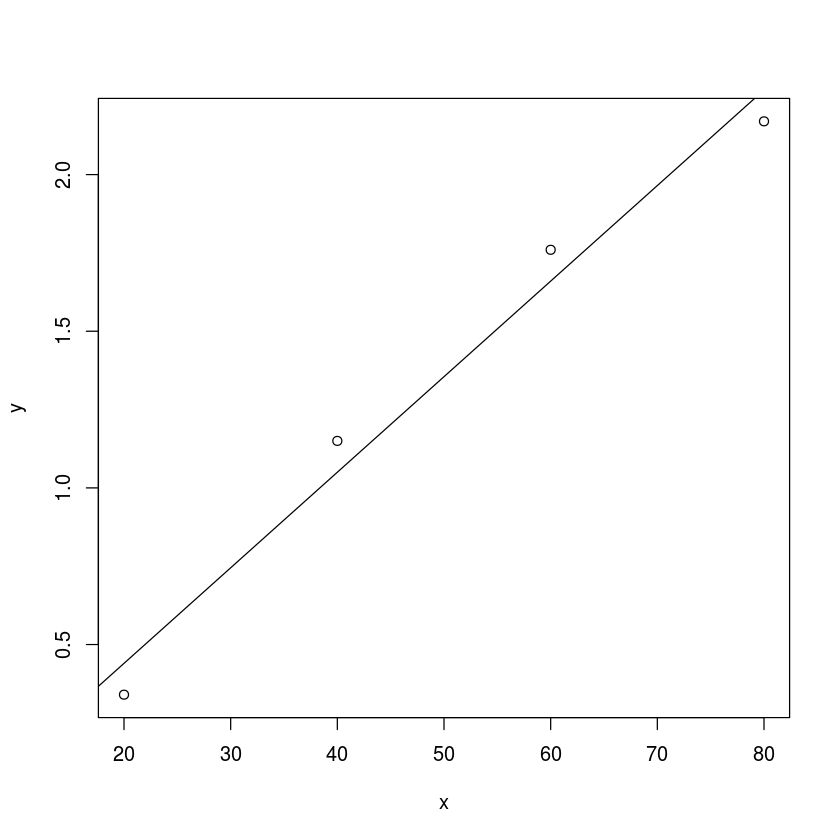

In [16]:
#check answer
fit <- lm(y~x)
summary(fit)
plot(x,y)
abline(fit)